# Mobile Phone Price Prediction: Linear Regression

**Objective:** Implement matrix-based Linear Regression using closed-form solution, gradient descent, and Ridge regression (L2). Evaluate prediction performance and feature importance.

## Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [25]:
dataset = pd.read_csv("Mobile-Price-Prediction-cleaned_data.csv")

print("| Columns | Data Type | Has Null Values? |")
for col in dataset.columns:
    print(f"| {col} | {dataset[col].dtype} | {'Yes' if dataset[col].isna().any() else 'No'} |")

| Columns | Data Type | Has Null Values? |
| Ratings | float64 | No |
| RAM | float64 | No |
| ROM | float64 | No |
| Mobile_Size | float64 | No |
| Primary_Cam | int64 | No |
| Selfi_Cam | float64 | No |
| Battery_Power | int64 | No |
| Price | int64 | No |


## Prepare Features and Target

In [26]:
# Features and target
X = dataset[['Ratings','RAM','ROM','Mobile_Size','Primary_Cam','Selfi_Cam','Battery_Power']].values
y = dataset['Price'].values.reshape(-1,1)  # column vector

# Add bias term
X = np.hstack([np.ones((X.shape[0],1)), X])

## Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Functions for Linear Regression

In [28]:
# Closed-form solution
def linear_regression_closed_form(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Gradient Descent
def linear_regression_gd(X, y, lr=0.01, iterations=1000):
    n, d = X.shape
    theta = np.zeros((d,1))
    for i in range(iterations):
        grad = (1/n) * (X.T @ (X @ theta - y))
        theta -= lr * grad
    return theta

# Ridge Regression Closed-form
def ridge_closed_form(X, y, lam=1.0):
    n, d = X.shape
    I = np.eye(d)
    I[0,0] = 0  # do not regularize bias
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta

# Ridge Regression Gradient Descent
def ridge_gd(X, y, lam=1.0, lr=0.01, iterations=1000):
    n, d = X.shape
    theta = np.zeros((d,1))
    for i in range(iterations):
        grad = (1/n)*(X.T @ (X @ theta - y)) + lam*np.vstack([[[0]], theta[1:]])
        theta -= lr*grad
    return theta

# Evaluate performance
def evaluate(X, y, theta):
    y_pred = X @ theta
    mse = np.mean((y - y_pred)**2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)
    return mse, rmse, r2, y_pred

# Plot predicted vs actual
def plot_predicted(y_true, y_pred, title='Predicted vs Actual'):
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.show()

## Closed-form and Gradient Descent Linear Regression

Closed-form: RMSE = 18601.56, R2 = 0.4222
Gradient Descent: RMSE = 18601.56, R2 = 0.4222


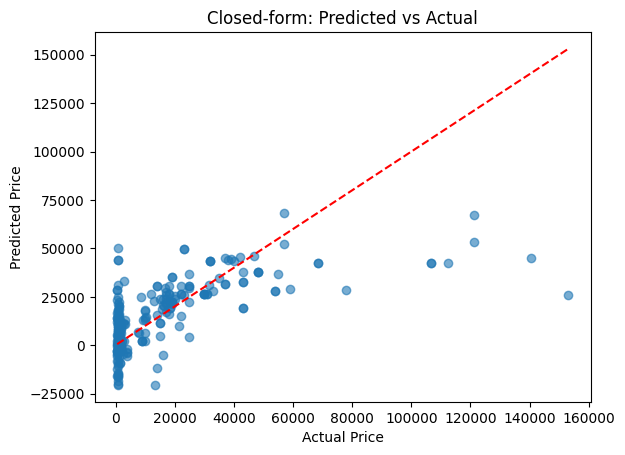

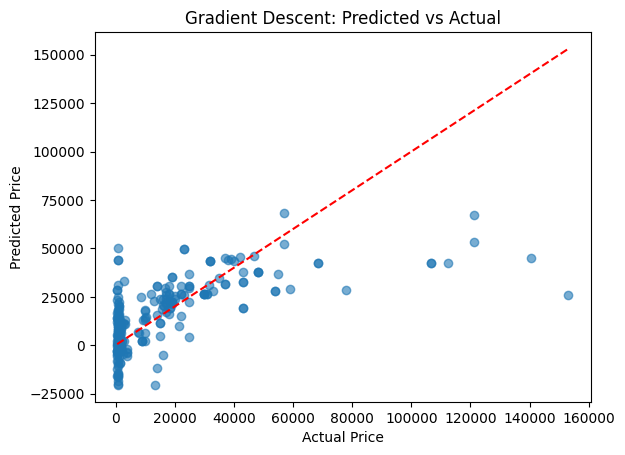

In [29]:
# ---------------- Standardize Features (exclude bias) ----------------
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[:,1:] = scaler.fit_transform(X_train[:,1:])
X_test_scaled[:,1:] = scaler.transform(X_test[:,1:])

# ---------------- Linear Regression ----------------
# Closed-form solution
theta_cf = linear_regression_closed_form(X_train_scaled, y_train)

# Gradient Descent
theta_gd = linear_regression_gd(X_train_scaled, y_train, lr=0.01, iterations=20000)

# ---------------- Evaluate ----------------
mse_cf, rmse_cf, r2_cf, y_pred_cf = evaluate(X_test_scaled, y_test, theta_cf)
mse_gd, rmse_gd, r2_gd, y_pred_gd = evaluate(X_test_scaled, y_test, theta_gd)

print(f"Closed-form: RMSE = {rmse_cf:.2f}, R2 = {r2_cf:.4f}")
print(f"Gradient Descent: RMSE = {rmse_gd:.2f}, R2 = {r2_gd:.4f}")

# ---------------- Plots ----------------
plot_predicted(y_test, y_pred_cf, "Closed-form: Predicted vs Actual")
plot_predicted(y_test, y_pred_gd, "Gradient Descent: Predicted vs Actual")


## Ridge Regression (L2) for Different λ Values

Ridge λ=0.1: RMSE=18601.29, R2=0.4222


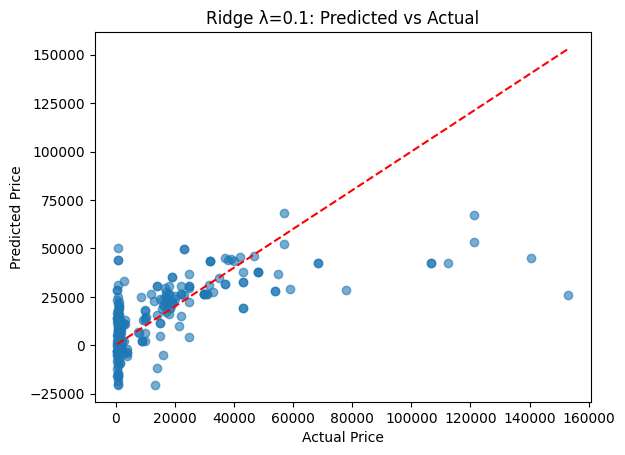

Ridge λ=1: RMSE=18598.81, R2=0.4224


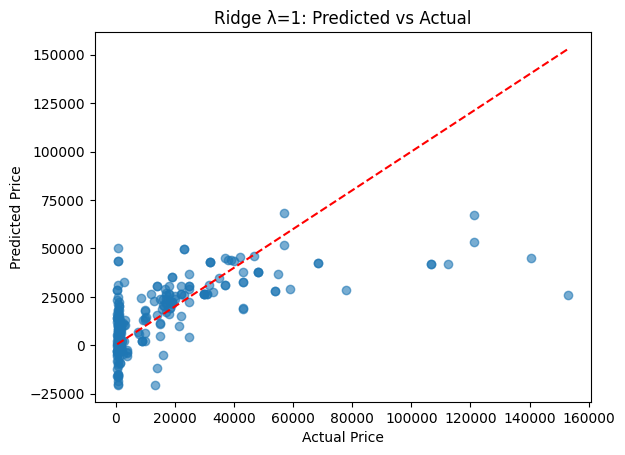

Ridge λ=10: RMSE=18576.41, R2=0.4238


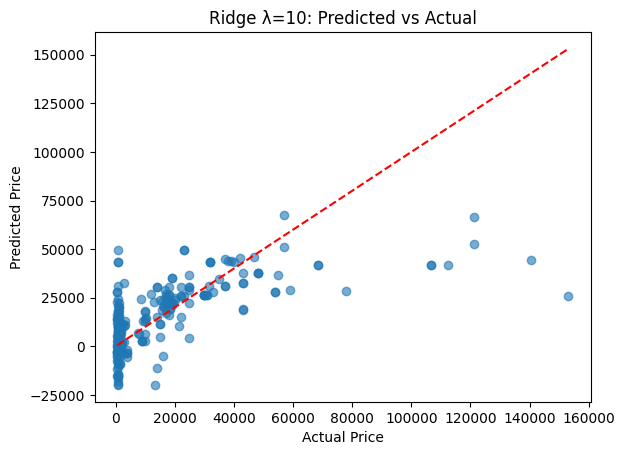

Ridge λ=100: RMSE=18515.28, R2=0.4276


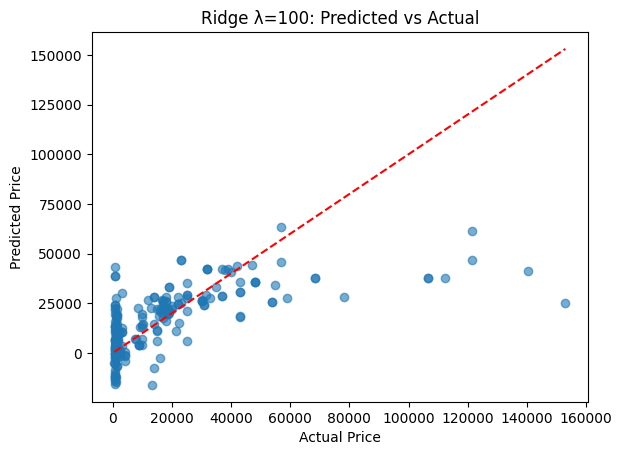

In [30]:
lam_values = [0.1, 1, 10, 100]

# Standardize features (excluding bias)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[:,1:] = scaler.fit_transform(X_train[:,1:])
X_test_scaled[:,1:] = scaler.transform(X_test[:,1:])

for lam in lam_values:
    theta_ridge = ridge_closed_form(X_train_scaled, y_train, lam)
    mse, rmse, r2, y_pred = evaluate(X_test_scaled, y_test, theta_ridge)
    print(f'Ridge λ={lam}: RMSE={rmse:.2f}, R2={r2:.4f}')
    plot_predicted(y_test, y_pred, f'Ridge λ={lam}: Predicted vs Actual')

## Ridge with and without Standardization

In [31]:
lam_values = [0.1, 1, 10, 100]

# --------- Without Standardization ---------
print("----- Ridge without Standardization -----")
for lam in lam_values:
    theta_ridge = ridge_closed_form(X_train, y_train, lam)
    mse, rmse, r2, y_pred = evaluate(X_test, y_test, theta_ridge)
    print(f"λ={lam}: RMSE={rmse:.2f}, R2={r2:.4f}")

# --------- With Standardization ---------
print("\n----- Ridge with Standardization -----")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[:,1:] = scaler.fit_transform(X_train[:,1:])
X_test_scaled[:,1:] = scaler.transform(X_test[:,1:])

for lam in lam_values:
    theta_ridge = ridge_closed_form(X_train_scaled, y_train, lam)
    mse, rmse, r2, y_pred = evaluate(X_test_scaled, y_test, theta_ridge)
    print(f"λ={lam}: RMSE={rmse:.2f}, R2={r2:.4f}")


----- Ridge without Standardization -----
λ=0.1: RMSE=18600.37, R2=0.4223
λ=1: RMSE=18590.53, R2=0.4229
λ=10: RMSE=18556.03, R2=0.4250
λ=100: RMSE=19099.51, R2=0.3909

----- Ridge with Standardization -----
λ=0.1: RMSE=18601.29, R2=0.4222
λ=1: RMSE=18598.81, R2=0.4224
λ=10: RMSE=18576.41, R2=0.4238
λ=100: RMSE=18515.28, R2=0.4276


## Feature Importance from Ridge Regression (λ=1)

In [32]:
theta_ridge = ridge_closed_form(X_train_scaled, y_train, lam=1)
feature_importance = pd.Series(theta_ridge[1:].flatten(), index=['Ratings','RAM','ROM','Mobile_Size','Primary_Cam','Selfi_Cam','Battery_Power'])
print('Feature Importance (Ridge λ=1):')
print(feature_importance.sort_values(key=abs, ascending=False))

Feature Importance (Ridge λ=1):
Ratings          9657.820019
RAM              5568.489250
Primary_Cam     -5227.448000
ROM              3705.856078
Battery_Power    1728.846286
Selfi_Cam         818.395757
Mobile_Size       533.774797
dtype: float64


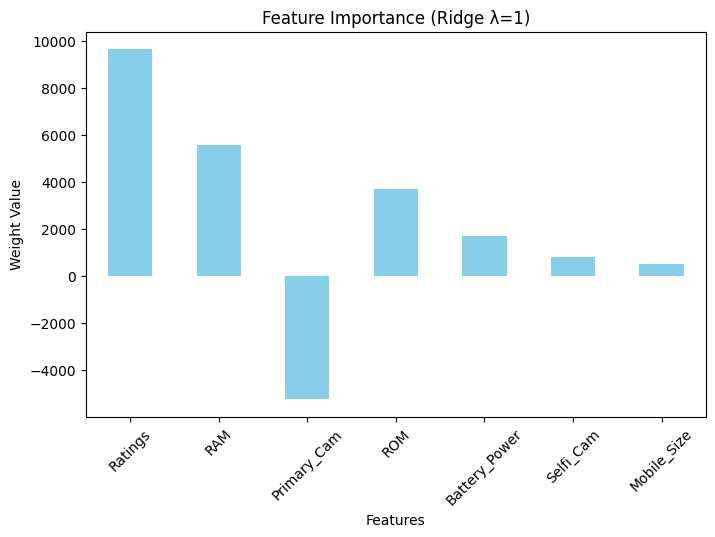

In [33]:
# Sort by absolute value for better visualization
feature_importance_sorted = feature_importance.reindex(feature_importance.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(8,5))
feature_importance_sorted.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Ridge λ=1)")
plt.ylabel("Weight Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()